<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Water Molecule (H₂O)**

[Water molecule](https://en.m.wikipedia.org/wiki/Water) (H₂O) has a bent (or V-shaped) molecular geometry

![science](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/H2O_2D_labelled.svg/320px-H2O_2D_labelled.svg.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1822.png)

In [ ]:
!pip install pyscf geometric -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize

In [16]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
'''

# Name
molecule = 'Water (H₂O)'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.build()

In [25]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -76.0267936449739


np.float64(-76.02679364497386)

converged SCF energy = -76.0267936449739


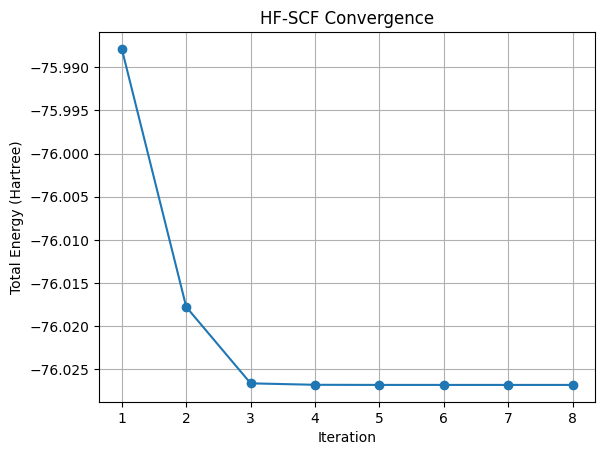

Ground state energy for Water (H₂O): -76.02679364497394 Hartree


In [5]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [26]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -76.4203489203945


np.float64(-76.42034892039449)

In [27]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -76.0267936449738
E(MP2) = -76.2307620085712  E_corr = -0.20396836359741
E(SCS-MP2) = -76.2269035845029  E_corr = -0.200109939529191
MP2 energy: -0.20396836359741038 Hartree


In [33]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
ccsd_calc = cc.CCSD(mf) # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")

E(CCSD) = -76.2400859050569  E_corr = -0.2132922600831528
CCSD(T) correction = -0.00305623252366069
HF-SCF energy: -76.02679364497386 Hartree


In [8]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -76.0267936449738
Excited State energies (eV)
[ 9.22143837 10.99767198 11.83503377]

** Singlet excitation energies and oscillator strengths **
Excited State   1:      9.22144 eV    134.45 nm  f=0.0285
Excited State   2:     10.99767 eV    112.74 nm  f=0.0000
Excited State   3:     11.83503 eV    104.76 nm  f=0.1077


In [9]:
# Geometry Optimization (in Angstroms) with HF or DFT
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-caf68300-121d-4088-981b-f6fd9261f773.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   H   0.000000   0.757000   0.586000    0.000000  0.000000  0.000000
   H   0.000000  -0.757000   0.586000    0.000000  0.000000  0.000000
converged SCF energy = -76.420348920371
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000    -0.0000000000     0.0159999932
1 H    -0.0000000000    -0.0069712967    -0.0080032992
2 H    -0.0000000000     0.0069712967    -0.0080032992
----------------------------------------------
cycle 1: E = -76.4203489204  dE = -76.4203  norm(grad) = 0.0219386


Step    0 : Gradient = 1.267e-02/1.600e-02 (rms/max) Energy = -76.4203489204
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.60000e-01 5.60557e-01 5.60557e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000   0.000000  -0.009850   -0.000000  0.000000 -0.009850
   H  -0.000000   0.757826   0.591030   -0.000000  0.000826  0.005030
   H  -0.000000  -0.757826   0.591030   -0.000000 -0.000826  0.005030
converged SCF energy = -76.4206192744383
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 O    -0.0000000000     0.0000000000     0.0024621874
1 H    -0.0000000000    -0.0005762092    -0.0012331562
2 H     0.0000000000     0.0005762092    -0.0012331562
----------------------------------------------
cycle 2: E = -76.4206192744  dE = -0.000270354  norm(grad) = 0.00312534


Step    1 : Displace = 7.047e-03/9.920e-03 (rms/max) Trust = 1.000e-01 (=) Grad = 1.804e-03/2.462e-03 (rms/max) E (change) = -76.4206192744 (-2.704e-04) Quality = 1.142
Hessian Eigenvalues: 4.99999e-02 5.00000e-02 5.00000e-02 ... 1.45087e-01 5.25420e-01 5.60557e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000   0.000000  -0.012486    0.000000  0.000000 -0.002636
   H   0.000000   0.756428   0.592426    0.000000 -0.001398  0.001396
   H  -0.000000  -0.756428   0.592426   -0.000000  0.001398  0.001396
converged SCF energy = -76.4206270213152
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000     0.0000000000     0.0000459641
1 H     0.0000000000    -0.0001193923    -0.0000247295
2 H    -0.0000000000     0.0001193923    -0.0000247295
----------------------------------------------
cycle 3: E = -76.4206270213  dE = -7.74688e-06  norm(grad) = 0.000178451


Step    2 : Displace = 2.217e-03/2.688e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 1.030e-04/1.219e-04 (rms/max) E (change) = -76.4206270213 (-7.747e-06) Quality = 0.984
Hessian Eigenvalues: 4.99973e-02 5.00000e-02 5.00000e-02 ... 1.57749e-01 4.91741e-01 5.60557e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000   0.000000  -0.012346   -0.000000 -0.000000  0.000141
   H  -0.000000   0.756683   0.592411   -0.000000  0.000255 -0.000015
   H  -0.000000  -0.756683   0.592411   -0.000000 -0.000255 -0.000015
converged SCF energy = -76.4206270677759
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000    -0.0000000000    -0.0000081275
1 H     0.0000000000     0.0000105437     0.0000023007
2 H    -0.0000000000    -0.0000105437     0.0000023007
----------------------------------------------
cycle 4: E = -76.4206270678  dE = -4.64606e-08  norm(grad) = 1.7291e-05


Step    3 : Displace = 2.208e-04/2.603e-04 (rms/max) Trust = 2.000e-01 (+) Grad = 9.983e-06/1.079e-05 (rms/max) E (change) = -76.4206270678 (-4.646e-08) Quality = 0.916
Hessian Eigenvalues: 4.99973e-02 5.00000e-02 5.00000e-02 ... 1.57749e-01 4.91741e-01 5.60557e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 8.388 seconds


[[-2.80270302e-14  2.72476469e-14 -2.33303856e-02]
 [-1.38552589e-15  1.42992438e+00  1.11949400e+00]
 [-2.52238129e-14 -1.42992438e+00  1.11949400e+00]]


converged SCF energy = -76.0267936449739


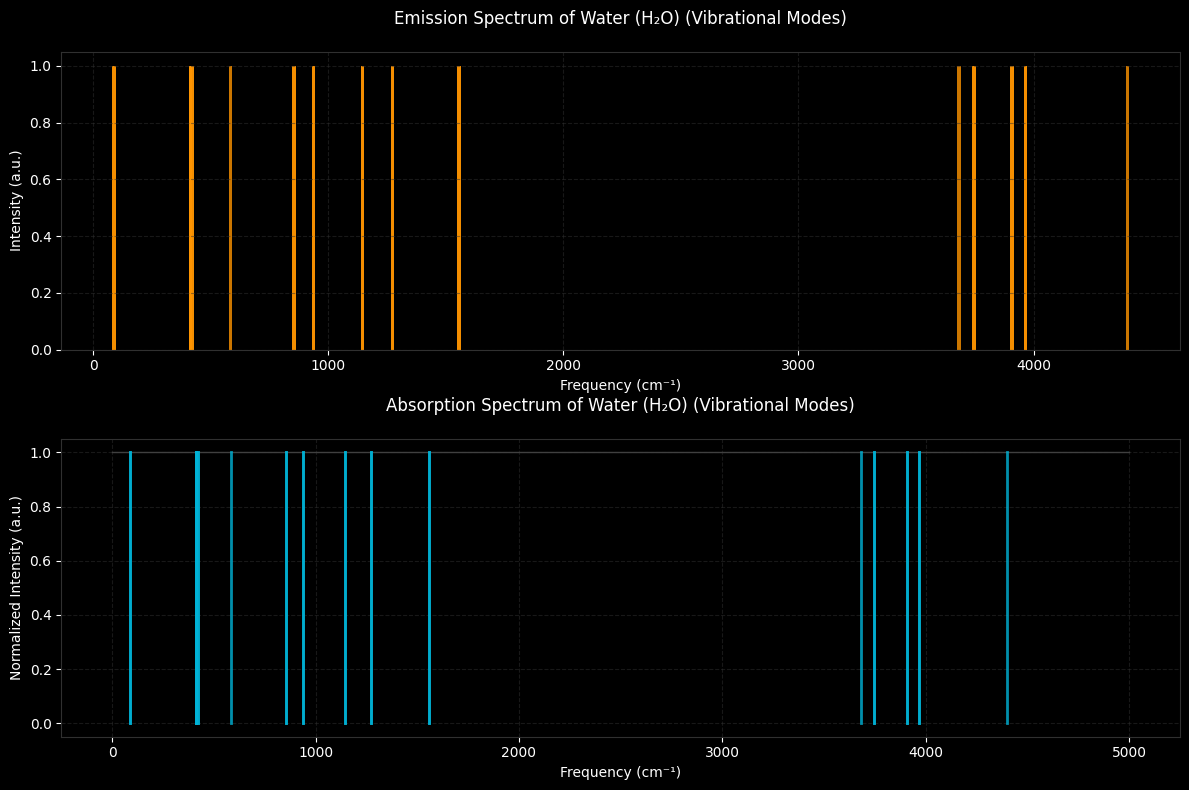

In [10]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid

# Step 1: Define the molecule ad basis
mol.atom = mol.atom
mol.basis = mol.basis
mol.symmetry = True
mol.build()

# Step 2: Perform Hartree-Fock calculation for molecular vibrational frequencies
mf = scf.RHF(mol)
mf.kernel()

# Step 3: Calculate the Hessian matrix (force constants)
hess = hessian.RHF(mf).kernel()

# Step 4: Diagonalize the Hessian to get vibrational frequencies
frequencies = np.linalg.eigvalsh(hess)
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)

# Step 5: Filter out non-physical (imaginary) frequencies and limit to realistic range
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Typical range for molecular vibrations

# Create figure with dark background
plt.figure(figsize=(12, 8), facecolor='black')
# Set the style to dark background
plt.style.use('dark_background')

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()

converged SCF energy = -74.9629466565387


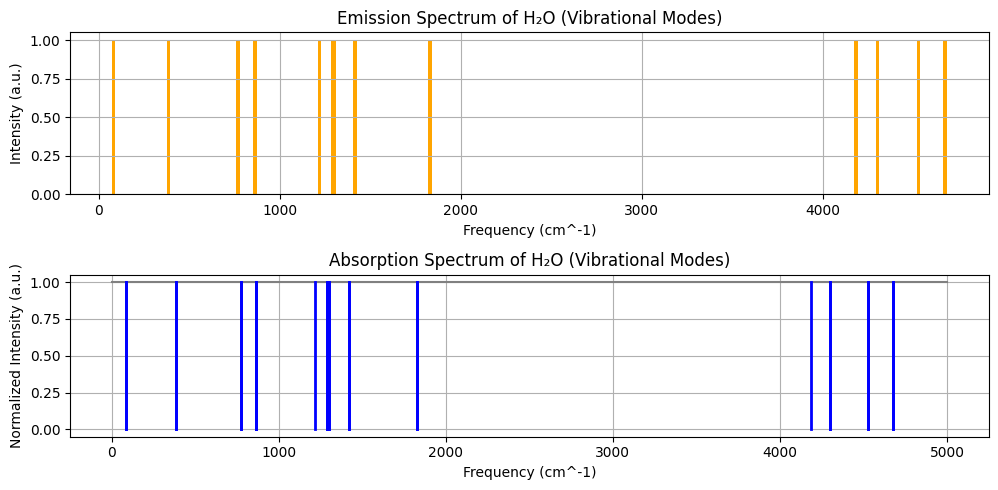

In [ ]:
# Appendix (review!) - Emission and Absorption Spectra (Electronic Frequencies / Transitions)
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian

# Step 1: Define the molecule (H2O in this case)
mol.atom = mol.atom
mol.basis = 'sto-3g'
mol.symmetry = True
mol.build()

# Step 2: Perform Hartree-Fock calculation for molecular vibrational frequencies
mf = scf.RHF(mol)
mf.kernel()

# Step 3: Calculate the Hessian matrix (force constants)
hess = hessian.RHF(mf).kernel()

# Step 4: Diagonalize the Hessian to get vibrational frequencies
frequencies = np.linalg.eigvalsh(hess)
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)

# Step 5: Filter out non-physical (imaginary) frequencies and limit to realistic range
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Typical range for molecular vibrations

# Step 6: Simulate and plot both emission and absorption spectra
# Emission Spectrum (peaks at specific frequencies)
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)  # First plot: Emission Spectrum
plt.bar(frequencies, height=1.0, width=20.0, color='orange')
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Intensity (a.u.)')
plt.title('Emission Spectrum of H₂O (Vibrational Modes)')
plt.grid(True)

# Absorption Spectrum (dips at specific frequencies)
plt.subplot(2, 1, 2)  # Second plot: Absorption Spectrum
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000), color='gray')  # Baseline at 1.0 intensity
for freq in frequencies:
    plt.plot([freq, freq], [1.0, 0.0], color='blue', lw=2)  # Draw vertical absorption dips
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Normalized Intensity (a.u.)')
plt.title('Absorption Spectrum of H₂O (Vibrational Modes)')
plt.grid(True)

plt.tight_layout()
plt.show()

converged SCF energy = -74.9629466565387


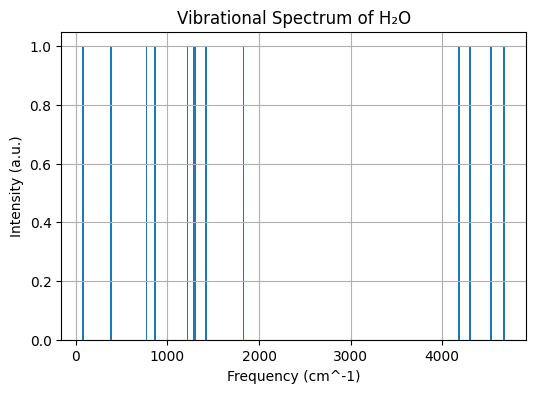

Vibrational frequencies (in cm^-1):
1218.90 cm^-1
4184.92 cm^-1
4302.54 cm^-1
1830.05 cm^-1
861.89 cm^-1
4302.54 cm^-1
1830.05 cm^-1
861.89 cm^-1
4676.28 cm^-1
82.16 cm^-1
861.89 cm^-1
770.78 cm^-1
1298.36 cm^-1
4529.69 cm^-1
1417.23 cm^-1
385.67 cm^-1
1290.59 cm^-1
4676.28 cm^-1
82.16 cm^-1
861.89 cm^-1
1417.23 cm^-1
385.67 cm^-1
1290.59 cm^-1
770.78 cm^-1
1298.36 cm^-1
4529.69 cm^-1


In [ ]:
# Appendix (review!) - Vibrational Frequencies
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian

# Step 1: Define the molecule (H2O in this case)
mol.atom = mol.atom
mol.basis = 'sto-3g'
mol.symmetry = True
mol.build()

# Step 2: Perform Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Step 3: Calculate the Hessian matrix (force constants)
# Hessian matrix of second derivatives of energy with respect to nuclear displacements is computed
hess = hessian.RHF(mf).kernel()

# Step 4: Diagonalize the Hessian to get vibrational frequencies
# Vvibrational frequencies are obtained by diagonalizing Hessian matrix and converting results from atomic units to cm⁻¹
frequencies = np.linalg.eigvalsh(hess)
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)

# Step 5: Filter out non-physical (imaginary) frequencies and limit to realistic range
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Typical range for molecular vibrations

# Step 6: Plot the vibrational spectrum
plt.figure(figsize=(6, 4))
plt.bar(frequencies, height=1.0, width=20.0)
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Intensity (a.u.)')
plt.title('Vibrational Spectrum of H₂O')
plt.grid(True)
plt.show()

# Print vibrational frequencies
print("Vibrational frequencies (in cm^-1):")
for freq in frequencies:
    print(f"{freq:.2f} cm^-1")